In [3]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


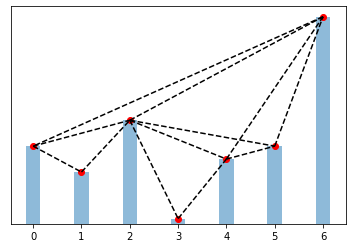

In [12]:
time_series = [[0,3], [1,2],[2,4],[3,0.2], [4,2.5],[5,3],[6,8]]

x_val = [x[0] for x in time_series]
y_val = [x[1] for x in time_series]
plt.bar(x_val,y_val,width=0.3, align='center', alpha=0.5)
plt.plot(x_val,y_val,'or')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k--')
for i in x_val:
    connectpoints(x_val,y_val,i-1,i)

connectpoints(x_val,y_val,0,2)
connectpoints(x_val,y_val,2,4)
connectpoints(x_val,y_val,2,5)
connectpoints(x_val,y_val,2,6)
connectpoints(x_val,y_val,4,6)

plt.yticks([])
plt.savefig("slides/nvg-all.png", dpi = 1000)
plt.show()

In [14]:
from itertools import combinations
import networkx as nx

def visibility_graph(series):

    g = nx.Graph()
    
    # convert list of magnitudes into list of tuples that hold the index
    tseries = []
    n = 0
    for magnitude in series:
        tseries.append( (n, magnitude ) )
        n += 1

    # contiguous time points always have visibility
    for n in range(0,len(tseries)-1):
        (ta, ya) = tseries[n]
        (tb, yb) = tseries[n+1]
        g.add_node(ta, mag=ya)
        g.add_node(tb, mag=yb)
        g.add_edge(ta, tb)

    for a,b in combinations(tseries, 2):
        # two points, maybe connect
        (ta, ya) = a
        (tb, yb) = b

        connect = True
        
        # let's see all other points in the series
        for tc, yc in tseries[ta:tb]:
            # other points, not a or b
            if tc != ta and tc != tb:
                # does c obstruct?
                if yc > yb + (ya - yb) * ( (tb - tc) / (tb - ta) ):
                    connect = False
                    
        if connect:
            g.add_edge(ta, tb)


    return g

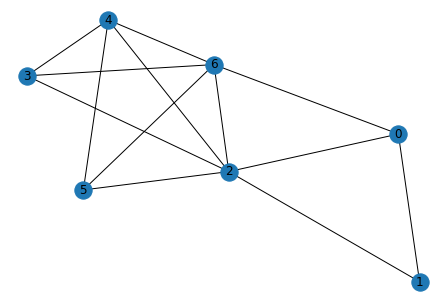

In [16]:
graph = visibility_graph(y_val)
nx.draw(graph, with_labels = True)
plt.savefig('slides/nvg.png', dpi = 1000)

[0, 1, 2, 3, 4, 5, 6]


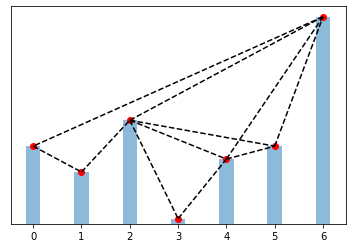

In [42]:
time_series = [[0,3], [1,2],[2,4],[3,0.2], [4,2.5],[5,3],[6,8]]

x_val = [x[0] for x in time_series]
y_val = [x[1] for x in time_series]
plt.bar(x_val,y_val,width=0.3, align='center', alpha=0.5)
plt.plot(x_val,y_val,'or')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k--')
for i in x_val:
    connectpoints(x_val,y_val,i-1,i)

connectpoints(x_val,y_val,2,4)
connectpoints(x_val,y_val,2,5)
connectpoints(x_val,y_val,2,6)
connectpoints(x_val,y_val,4,6)

plt.yticks([])
plt.show()